## Dataset

In [0]:
# upload the simpsons dataset (the dataset you just downloaded to your local computer). I tried to automate this process using wget command and giving it the link. But had problems with Google drive links. If you come up with automate the process please let me know.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving the-simpsons-dataset.zip to the-simpsons-dataset.zip
User uploaded file "the-simpsons-dataset.zip" with length 118564451 bytes


You are unzipping the zipped dataset.

In [0]:
!unzip the-simpsons-dataset.zip >/dev/null

In [0]:
import os, shutil

base_dir = '/content/the-simpsons-dataset'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')



# Directory with our training Homer pictures
train_Homer_dir = os.path.join(train_dir, 'Homer')

# Directory with our training Marge pictures
train_Marge_dir = os.path.join(train_dir, 'Marge')

# Directory with our training Lisa pictures
train_Lisa_dir = os.path.join(train_dir, 'Lisa')

# Directory with our training Bart pictures
train_Bart_dir = os.path.join(train_dir, 'Bart')



# Directory with our validation Homer pictures
validation_Homer_dir = os.path.join(validation_dir, 'Homer')

# Directory with our validation Marge pictures
validation_Marge_dir = os.path.join(validation_dir, 'Marge')

# Directory with our validation Lisa pictures
validation_Lisa_dir = os.path.join(validation_dir, 'Lisa')

# Directory with our validation Bart pictures
validation_Bart_dir = os.path.join(validation_dir, 'Bart')





# Directory with our test Homer pictures
test_Homer_dir = os.path.join(test_dir, 'Homer')

# Directory with our test Marge pictures
test_Marge_dir = os.path.join(test_dir, 'Marge')

# Directory with our test Lisa pictures
test_Lisa_dir = os.path.join(test_dir, 'Lisa')

# Directory with our test Bart pictures
test_Bart_dir = os.path.join(test_dir, 'Bart')





Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/30
 - 12s - loss: 1.1351 - acc: 0.4910 - val_loss: 0.9535 - val_acc: 0.5880
Epoch 2/30
 - 11s - loss: 0.8808 - acc: 0.6130 - val_loss: 0.8210 - val_acc: 0.6630
Epoch 3/30
 - 11s - loss: 0.8234 - acc: 0.6430 - val_loss: 0.7632 - val_acc: 0.6890
Epoch 4/30
 - 11s - loss: 0.7494 - acc: 0.6845 - val_loss: 0.8405 - val_acc: 0.6380
Epoch 5/30
 - 11s - loss: 0.6825 - acc: 0.7150 - val_loss: 0.7534 - val_acc: 0.6860
Epoch 6/30
 - 11s - loss: 0.6552 - acc: 0.7325 - val_loss: 0.7277 - val_acc: 0.6960
Epoch 7/30
 - 11s - loss: 0.6137 - acc: 0.7645 - val_loss: 0.6803 - val_acc: 0.7060
Epoch 8/30
 - 11s - loss: 0.5806 - acc: 0.7700 - val_loss: 0.6728 - val_acc: 0.7230
Epoch 9/30
 - 11s - loss: 0.5129 - acc: 0.7965 - val_loss: 0.6587 - val_acc: 0.7200
Epoch 10/30
 - 11s - loss: 0.4965 - acc: 0.8075 - val_loss: 0.6210 - val_acc: 0.7410
Epoch 11/30
 - 11s - loss: 0.4104 

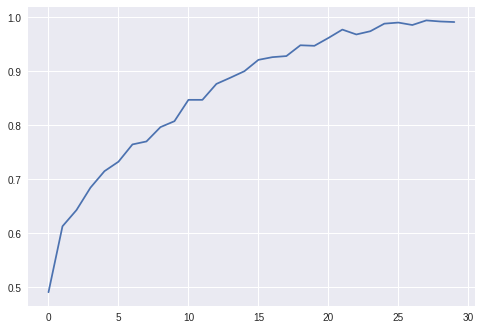

[0.7829789355397224, 0.7800000011920929]


In [0]:
import matplotlib.pyplot as plt
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


num_classes = 4
model = Sequential()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

rmsprop = optimizers.RMSprop(lr = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer = rmsprop, metrics = ['accuracy'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50,
        verbose = 2)

score = model.evaluate_generator(test_generator, steps=10, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
print(score)
try:
  plt.plot(history.history['acc'])
#   pllt.plot(history.history['loss'])
  plt.show()
except:
  pass
print(score)


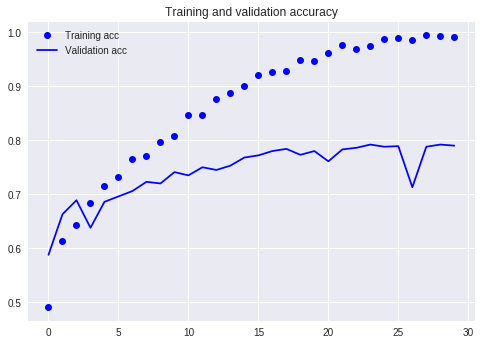

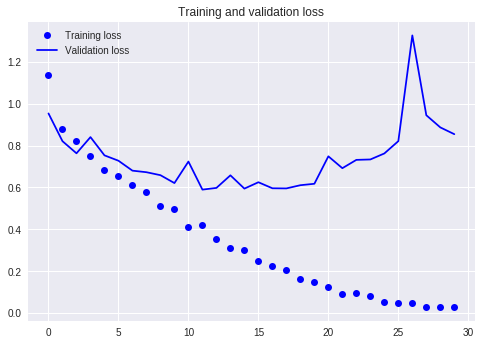

In [0]:
import matplotlib.pyplot as plt




acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Step 2: Fight against overfitting

Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/30
 - 12s - loss: 1.2029 - acc: 0.4335 - val_loss: 0.9975 - val_acc: 0.5740
Epoch 2/30
 - 11s - loss: 0.9791 - acc: 0.5680 - val_loss: 0.9208 - val_acc: 0.5960
Epoch 3/30
 - 11s - loss: 0.9113 - acc: 0.6165 - val_loss: 0.8619 - val_acc: 0.6320
Epoch 4/30
 - 11s - loss: 0.8178 - acc: 0.6490 - val_loss: 0.8518 - val_acc: 0.6550
Epoch 5/30
 - 11s - loss: 0.8009 - acc: 0.6680 - val_loss: 0.7860 - val_acc: 0.6490
Epoch 6/30
 - 11s - loss: 0.7608 - acc: 0.6805 - val_loss: 0.7342 - val_acc: 0.6770
Epoch 7/30
 - 11s - loss: 0.6990 - acc: 0.7110 - val_loss: 0.6991 - val_acc: 0.7160
Epoch 8/30
 - 11s - loss: 0.6904 - acc: 0.7165 - val_loss: 0.6876 - val_acc: 0.7060
Epoch 9/30
 - 11s - loss: 0.6446 - acc: 0.7345 - val_loss: 0.7116 - val_acc: 0.7050
Epoch 10/30
 - 11s - loss: 0.6267 - acc: 0.7410 - val_loss: 0.6715 - val_acc: 0.7140
Epoch 11/30
 - 11s - loss: 0.5786 

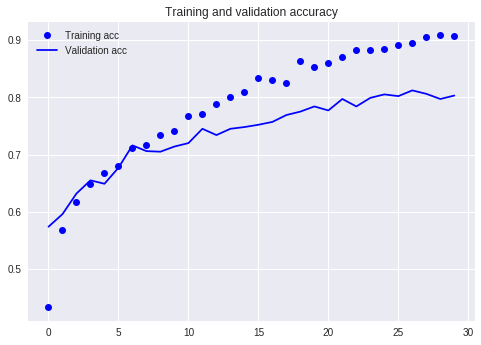

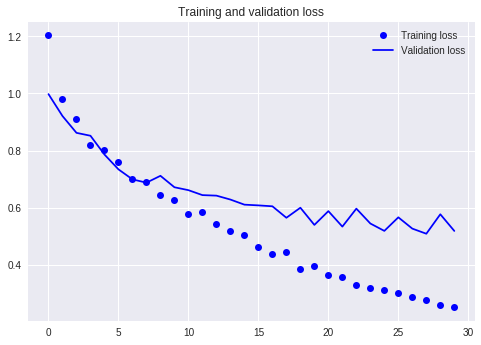

In [0]:
import matplotlib.pyplot as plt
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


num_classes = 4
model = Sequential()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

rmsprop = optimizers.RMSprop(lr = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer = rmsprop, metrics = ['accuracy'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50,
        verbose = 2)

score = model.evaluate_generator(test_generator, steps=10, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)



acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Data augmentation


In [0]:
datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/30
 - 45s - loss: 1.2420 - acc: 0.4185 - val_loss: 1.0261 - val_acc: 0.5460
Epoch 2/30
 - 41s - loss: 1.0921 - acc: 0.5020 - val_loss: 0.9211 - val_acc: 0.5910
Epoch 3/30
 - 41s - loss: 1.0444 - acc: 0.5380 - val_loss: 0.8690 - val_acc: 0.6240
Epoch 4/30
 - 40s - loss: 0.9836 - acc: 0.5670 - val_loss: 0.8331 - val_acc: 0.6310
Epoch 5/30
 - 40s - loss: 0.9464 - acc: 0.5862 - val_loss: 0.7761 - val_acc: 0.6670
Epoch 6/30
 - 40s - loss: 0.8942 - acc: 0.6087 - val_loss: 0.7787 - val_acc: 0.6400
Epoch 7/30
 - 40s - loss: 0.8558 - acc: 0.6282 - val_loss: 0.7383 - val_acc: 0.6720
Epoch 8/30
 - 41s - loss: 0.8327 - acc: 0.6420 - val_loss: 0.7600 - val_acc: 0.6770
Epoch 9/30
 - 41s - loss: 0.7992 - acc: 0.6537 - val_loss: 0.6758 - val_acc: 0.7040
Epoch 10/30
 - 41s - loss: 0.7532 - acc: 0.6815 - val_loss: 0.6506 - val_acc: 0.7160
Epoch 11/30
 - 40s - loss: 0.7395 

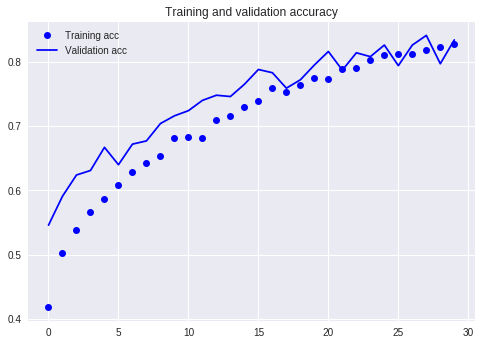

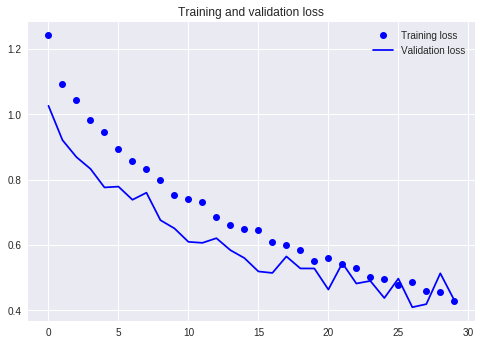

In [0]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

# fnames = [os.path.join(train_Bart_dir, fname) for fname in os.listdir(train_Bart_dir)]

# # We pick one image to "augment"
# img_path = fnames[7]

# # Read the image and resize it
# img = image.load_img(img_path, target_size=(150, 150))

# # Convert it to a Numpy array with shape (150, 150, 3)
# x = image.img_to_array(img)

# # Reshape it to (1, 150, 150, 3)
# x = x.reshape((1,) + x.shape)

# # The .flow() command below generates batches of randomly transformed images.
# # It will loop indefinitely, so we need to `break` the loop at some point!
# i = 0
# for batch in datagen.flow(x, batch_size=1):
#     plt.figure(i)
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
#     i += 1
#     if i % 4 == 0:
#         break

# plt.show()


# train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=40,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')


num_classes = 4
model = Sequential()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

rmsprop = optimizers.RMSprop(lr = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer = rmsprop, metrics = ['accuracy'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50,
        verbose = 2)

score = model.evaluate_generator(test_generator, steps=10, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
print(score)


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

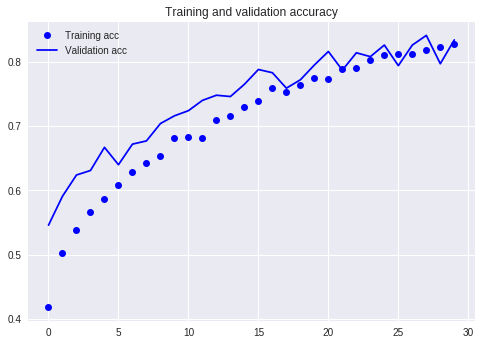

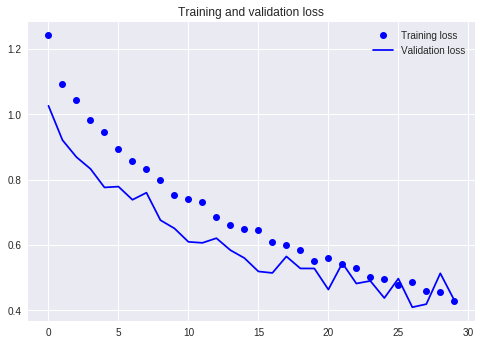

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Step 3: Using a pretrained model 


In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 5s 0us/step


In [0]:
# import numpy as np
# train_features = np.reshape(train_features, (3000, 4 * 4 * 512))
# validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
# test_features = np.reshape(test_features, (800, 4 * 4 * 512))


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=40,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')



model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))

model.add(Dense(4, activation = 'softmax'))

rmsprop = optimizers.RMSprop(lr = 1e-4)

model.compile(loss = 'categorical_crossentropy', optimizer = rmsprop, metrics = ['accuracy'])



history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

score = model.evaluate_generator(test_generator, steps=10, max_queue_size=10, workers=1, use_multiprocessing=False)



Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 73s 729ms/step - loss: 0.9235 - acc: 0.6005 - val_loss: 0.2708 - val_acc: 0.9150
Epoch 2/30
100/100 [==============================] - 66s 659ms/step - loss: 0.2501 - acc: 0.9115 - val_loss: 0.1920 - val_acc: 0.9310
Epoch 3/30
100/100 [==============================] - 66s 656ms/step - loss: 0.1913 - acc: 0.9410 - val_loss: 0.1755 - val_acc: 0.9470
Epoch 4/30
100/100 [==============================] - 66s 656ms/step - loss: 0.1281 - acc: 0.9673 - val_loss: 0.4108 - val_acc: 0.8470
Epoch 5/30
100/100 [==============================] - 66s 656ms/step - loss: 0.0847 - acc: 0.9733 - val_loss: 0.3584 - val_acc: 0.8650
Epoch 6/30
100/100 [==============================] - 66s 655ms/step - loss: 0.0910 - acc: 0.9728 - val_loss: 0.2918 - val_acc: 0.9070
Epoch 7/30
100/100 [==============================] - 65s 655ms/s

NameError: ignored

[0.7105565011501312, 0.9475000023841857]


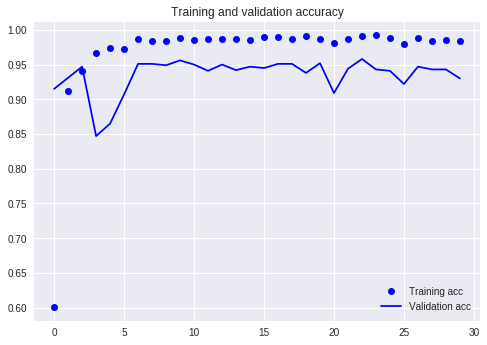

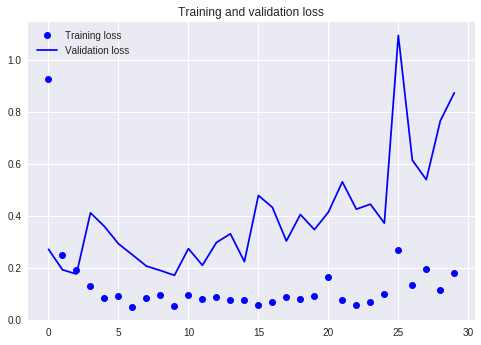

In [0]:
print(score)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



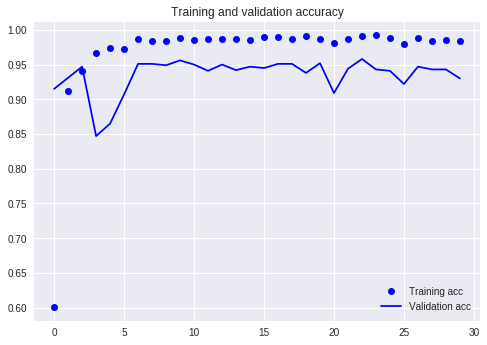

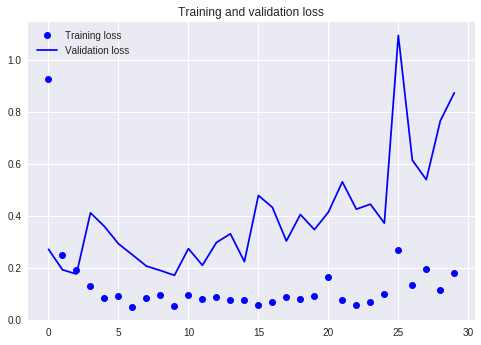

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Step 4: Using augmented data, add dropout, add pretrained base model to your model and fine tune last layer of it

Found 3000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 79s 789ms/step - loss: 1.4132 - acc: 0.2712 - val_loss: 1.3377 - val_acc: 0.3580
Epoch 2/30
100/100 [==============================] - 69s 689ms/step - loss: 1.1942 - acc: 0.4325 - val_loss: 0.7518 - val_acc: 0.6720
Epoch 3/30
100/100 [==============================] - 69s 691ms/step - loss: 0.7434 - acc: 0.6985 - val_loss: 0.1923 - val_acc: 0.9420
Epoch 4/30
100/100 [==============================] - 69s 689ms/step - loss: 0.4953 - acc: 0.8452 - val_loss: 0.2114 - val_acc: 0.9450
Epoch 5/30
100/100 [==============================] - 69s 687ms/step - loss: 0.4010 - acc: 0.8782 - val_loss: 0.1994 - val_acc: 0.9250
Epoch 6/30
100/100 [==============================] - 69s 687ms/step - loss: 0.3077 - acc: 0.8938 - val_loss: 0.1666 - val_acc: 0.9490
Epoch 7/30
100/100 [==============================] - 69s 687ms/s

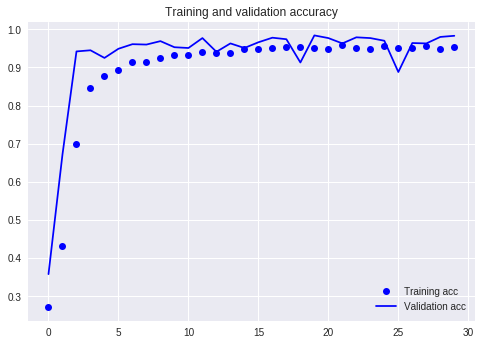

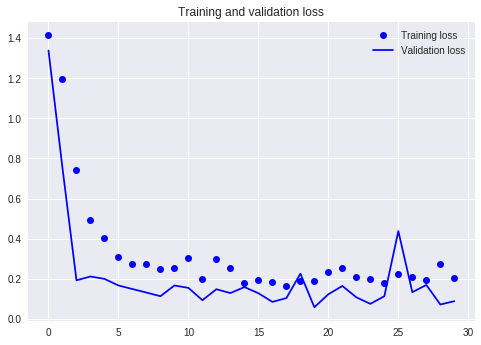

In [0]:
import matplotlib.pyplot as plt
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

train_generator = datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=40,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')


model = Sequential()
model.add(conv_base)

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

rmsprop = optimizers.RMSprop(lr = 1e-4)
model.compile(loss = 'categorical_crossentropy', optimizer = rmsprop, metrics = ['accuracy'])


history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

score = model.evaluate_generator(test_generator, steps=10, max_queue_size=10, workers=1, use_multiprocessing=False)
print(score)




acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=40)
print('test acc:', test_acc)

Found 800 images belonging to 4 classes.
test acc: 0.9799999982118607


# Step 5: 
After you finish training your model, go around your department and show your achievement to your friends and brag about your AI program that can automatically identify the Simpsons... well except Margie!

![alt text](https://i0.wp.com/www.cordcuttersnews.com/wp-content/uploads/2017/07/simpsons-2.jpg?ssl=1)